To everyone looking at this Kernel, 
I am new to Python and this is my first project on Kaggle. I have choosen this dataset in order to make sure that I understand the conepts that I have learnt recently. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir("../input"))


['911.csv']


In [2]:
# Reading the given data
df = pd.read_csv('../input/911.csv')
#displaying the head of the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
#checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


Checking the top 5 Townships(twp) that call 911 

In [4]:
df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

Checking the top 5 zip codes that call 911

In [5]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

Top 5 reasons['title'] for calling 911 

In [6]:
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    98401
Traffic: DISABLED VEHICLE -    31871
Fire: FIRE ALARM               24380
EMS: FALL VICTIM               21253
EMS: RESPIRATORY EMERGENCY     21158
Name: title, dtype: int64

Number of unique reasons['title'] for calling 911

In [7]:
#number of unique reasons['title'] for calling 911
df['title'].nunique()

141

Each title has a particular reson for which 911 was called and they are:- EMS:, Fire: and traffic:. Lets create a specific column for these resons

In [8]:
df['reasons']=df['title'].apply(lambda title: title.split(':')[0])


Now see which reason leads to  the most 911 calls

In [9]:
df['reasons'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reasons, dtype: int64

Lets compare the above results as countplot using seaborn

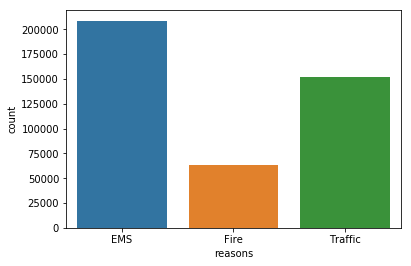

In [10]:
sns.countplot(x=df['reasons'],data=df)
plt.show()

Now lets Focus on the time information

In [11]:
#checking the data type of the column timeStamps
type(df['timeStamp'].iloc[0])

str

In [12]:
#in order to further manipulate the data lets convert the timeStamp form str to DataTime objects
df['timeStamp']=pd.to_datetime(df['timeStamp'])

Now lets create new columns in order to know the exact hour, month and day of the week of the 911 calls using timeStamp column

In [13]:
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time: time.dayofweek)

In [14]:
df['Day of Week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

We can see how day of week is in integer data type, 0-6 but we can have string names for the day of the week by creating a dictionary and assigning each value to it

In [15]:
# creating the dictionary
dmap={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
# Changing the day of the week column to have proper strings
df['Day of Week']=df['Day of Week'].map(dmap)

In [16]:
#making sure that the changes took place
df['Day of Week'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

Lets use seaborn to create a countplot for the Day of Week based on reasons for the 911 calls

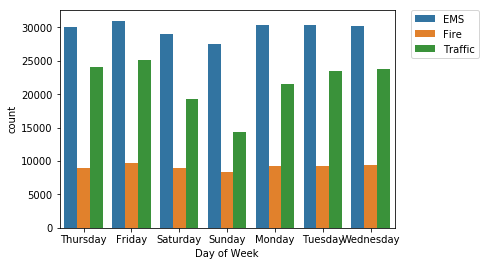

In [17]:
sns.countplot(x=df['Day of Week'], data=df,hue='reasons')
plt.legend(bbox_to_anchor=(1.05,1),loc=(2),borderaxespad=0.)
plt.show()

Lets do the same with months instead of day of the week

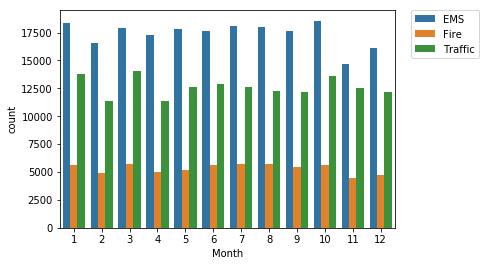

In [18]:
sns.countplot(x=df['Month'], data=df,hue='reasons')
plt.legend(bbox_to_anchor=(1.05,1),loc=(2),borderaxespad=0.)
plt.show()

Lets create a new date column from timeStamp in order to get better perspective of when the 911 calls were made

In [19]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Now that we have a column for date we use this data in order to represent how different reasons affected the 911 calls on different dates

911 calls according to date

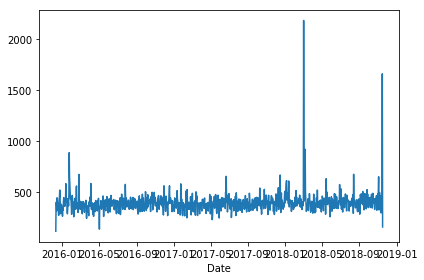

In [20]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

How traffic affected 911 calls on particular dates

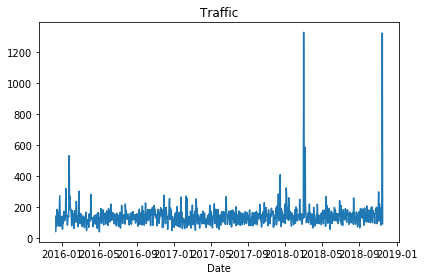

In [21]:
df[df['reasons']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

How EMS affected 911 calls on particular dates

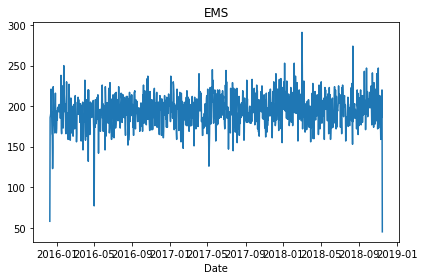

In [22]:
df[df['reasons']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

How Fire affected 911 calls on particular dates

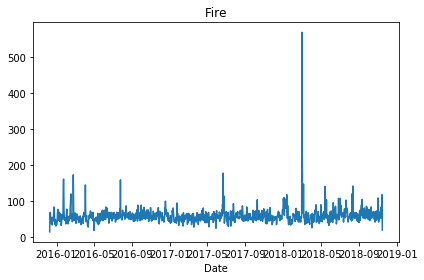

In [23]:
df[df['reasons']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

Now lets make Heat Map in order to better represent the given data, but in order to do so we will have to manipulate the data in order to have the index as days of the week and the columns to be the hours. 

In [24]:
dayHour=df.groupby(by=['Day of Week','Hour']).count()['reasons'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Friday,1185,1001,930,832,821,1051,1676,2689,3185,3295,3494,3667,3879,4002,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Monday,1207,974,857,784,871,1124,1729,2829,3588,3685,3422,3600,3752,3571,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Saturday,1515,1332,1206,1012,936,985,1230,1640,2211,2766,3119,3428,3544,3524,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sunday,1520,1331,1263,1033,954,941,1119,1568,1933,2421,2776,2787,3078,2887,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thursday,1115,873,920,775,784,1091,1801,2913,3468,3457,3533,3514,3796,4031,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


Lets see the heatmap for dayHour

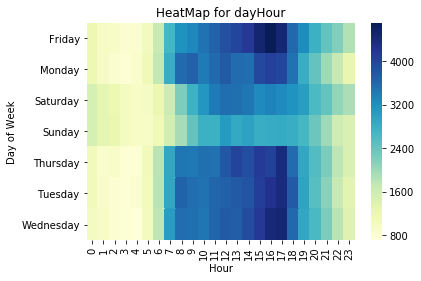

In [25]:
sns.heatmap(dayHour,cmap='YlGnBu').set_title('HeatMap for dayHour')
plt.show()

Lets see a clustermap for dayHour

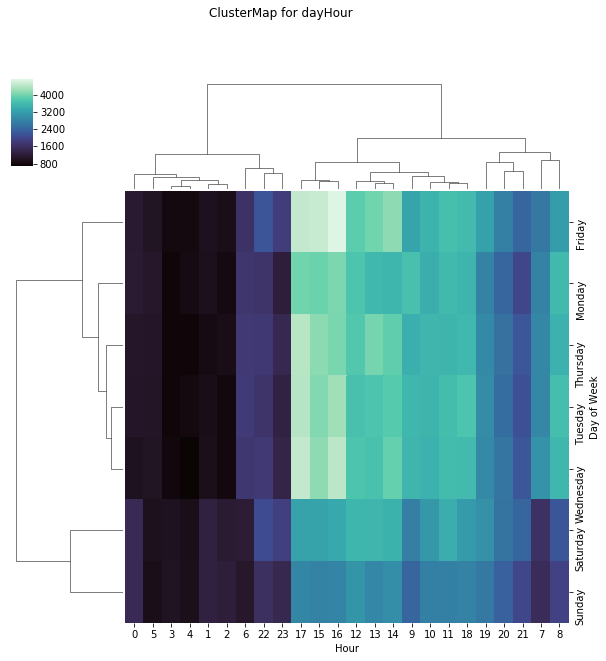

In [26]:
sns.clustermap(dayHour,cmap='mako').fig.suptitle('ClusterMap for dayHour')
plt.show()

Lets create heatmaps to have months as columns and index as days of the week

In [27]:
dayMonth=df.groupby(by=['Day of Week','Month']).count()['reasons'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Friday,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Monday,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Saturday,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sunday,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thursday,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899


Lets see the heatmap for dayMonth

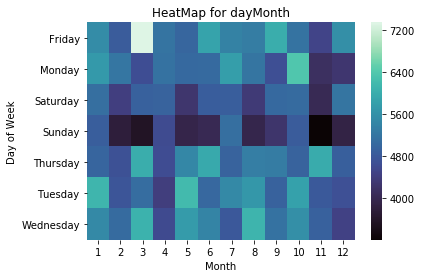

In [28]:
sns.heatmap(dayMonth,cmap='mako').set_title('HeatMap for dayMonth')
plt.show()

Lets see a clustermap for dayMonth

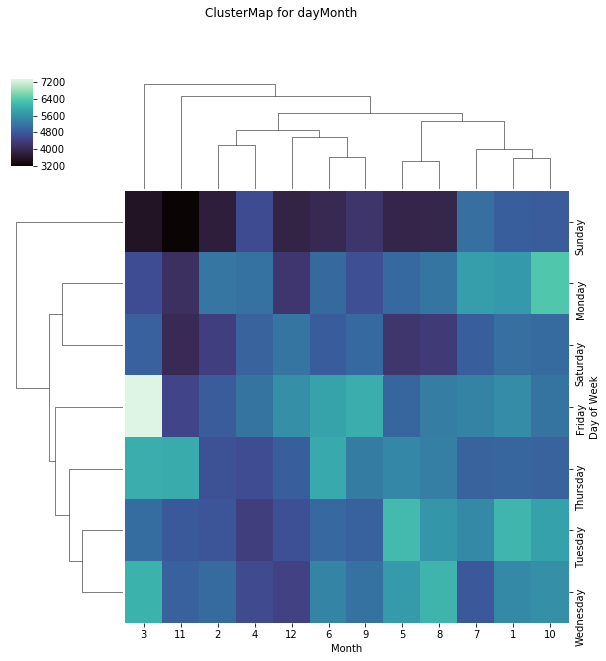

In [30]:
sns.clustermap(dayMonth,cmap='mako').fig.suptitle('ClusterMap for dayMonth')
plt.show()